In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Test the error propagation

#Setup source and background values in electron
bkgval_electron = 5000
source_value = 500
#Source size
source_width = 100
#Image size
height, width = 500, 500

#Other relevant parameters
nimages = 20
Cal= 0.01
texp = 120

stack_images = np.zeros((nimages,height,width))
stack_variance = np.zeros((nimages,height,width))

for i in range(nimages):

    # draw samples
    rng = np.random.default_rng()
    img = rng.normal(loc=bkgval_electron, scale=bkgval_electron**0.5, size=(height, width))

    #add source (all unista are electrons here)
    source_pos = (int(height / 2), int(width / 2))
    source_hwidth = int(source_width / 2)
    source_amplitudes = rng.normal(loc=source_value, scale=source_value**0.5, size=(source_width,source_width))
    img[source_pos[0]-source_hwidth:source_pos[0]+source_hwidth, source_pos[1]-source_hwidth:source_pos[1]+source_hwidth] += source_amplitudes

    #store mean and variance images in physical units
    stack_variance[i,:,:] = img*(Cal/texp)**2
    stack_images[i,:,:] = img*Cal/texp

mean_image  = np.mean(stack_images, axis=0)
mean_variance = np.mean(stack_variance, axis=0)/nimages

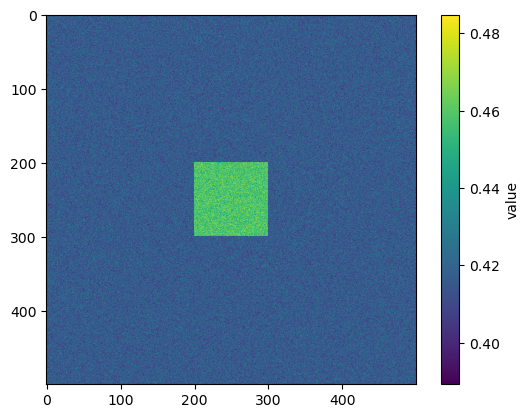

In [3]:
#display single image
# display
plt.imshow(stack_images[0])
plt.colorbar(label='value')
plt.show()


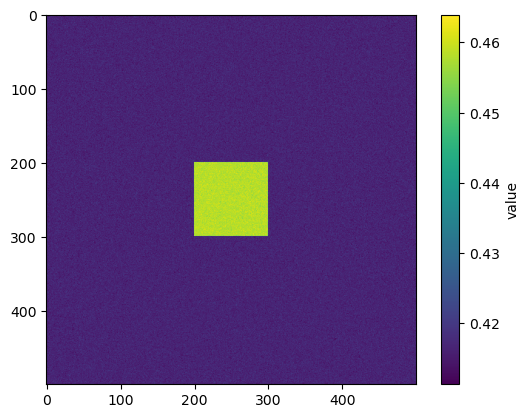

In [4]:
#display mean image
plt.imshow(mean_image)
plt.colorbar(label='value')
plt.show()

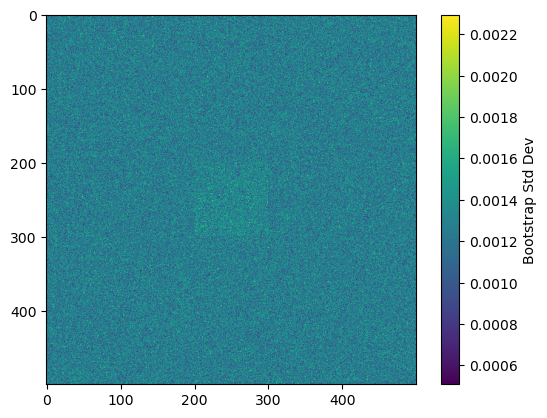

In [5]:
#now build a boostrap
nboot = 5000
boot_means = np.zeros((nboot,height,width))
for iboot in range(nboot):
    sample_indices = np.random.randint(0, nimages, size=nimages)
    boot_sample = stack_images[sample_indices,:,:]
    boot_means[iboot,:,:] = np.mean(boot_sample, axis=0)

boot_std = np.std(boot_means, axis=0)

plt.imshow(boot_std)
plt.colorbar(label='Bootstrap Std Dev')
plt.show()

In [17]:
#rms of the final sky
rms_sky = np.std(mean_image[:,0:200])

print('Final sky rms (as measured on the final image) {:6.5f}'.format(rms_sky))
print('Theoretical sky rms (sigma of the mean) {:6.5f}'.format(np.sqrt(bkgval_electron)*Cal/texp/nimages**0.5))
print('Bootstrap sky rms {:6.5f}'.format(np.mean(boot_std[:,0:200])))
print('Propagated sky rms (from variance maps) {:6.5f}'.format(np.mean(np.sqrt(mean_variance[:,0:200]))))


Final sky rms (as measured on the final image) 0.00132
Theoretical sky rms (sigma of the mean) 0.00132
Bootstrap sky rms 0.00127
Propagated sky rms (from variance maps) 0.00132


In [18]:
#now compute the source error
source_flux_1pix = np.mean(mean_image[source_pos[0]-source_hwidth:source_pos[0]+source_hwidth, source_pos[1]-source_hwidth:source_pos[1]+source_hwidth]-bkgval_electron*Cal/texp)

source_error= np.sqrt(source_flux_1pix*Cal/(nimages*texp))

print('Source flux (in 1 pixel): {:6.5f}'.format(source_flux_1pix))
print('Theoretical source flux (in 1 pixel): {:6.5f}'.format(source_value*Cal/texp))

print('Theoretical source error: (in 1 pixel) {:6.5f}'.format(np.sqrt(source_value*(Cal/texp)**2/nimages)))
print('Error propagated source error: (in 1 pixel) {:6.5f}'.format(source_error))


Source flux (in 1 pixel): 0.04167
Theoretical source flux (in 1 pixel): 0.04167
Theoretical source error: (in 1 pixel) 0.00042
Error propagated source error: (in 1 pixel) 0.00042


In [22]:
#Total error (bkg + source), only valid where there is the source
print('Error propagated total error (in 1 pixel): {:6.5f}'.format(np.sqrt(source_flux_1pix*Cal/(nimages*texp) + rms_sky**2)))
print('Bootstrap total error (in 1 pixel) {:6.5f}'.format(np.mean(boot_std[source_pos[0]-source_hwidth:source_pos[0]+source_hwidth, source_pos[1]-source_hwidth:source_pos[1]+source_hwidth])))



Error propagated total error (in 1 pixel): 0.00138
Bootstrap sky rms 0.00133
